# **Iris Species Classification using K-Nearest Neighbors (KNN) Algorithm**


* The primary goal of this project is to understand and implement the K-Nearest Neighbors (KNN) algorithm for classification tasks.
* We will use the famous Iris dataset to classify different iris species based on their sepal and petal measurements.
* We will explore various aspects of KNN, including feature normalization, hyperparameter tuning (choosing the optimal 'k' value), model evaluation using accuracy and confusion matrix, and visualization of decision boundaries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

###Load the dataset

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/SiddardhaShayini/Iris-Species-Classification-using-K-Nearest-Neighbors-KNN-Algorithm/refs/heads/main/Dataset/Iris.csv"
iris_df = pd.read_csv(url)

In [3]:
print("Dataset loaded successfully.")
print("First 5 rows of the dataset:")
iris_df.head()

Dataset loaded successfully.
First 5 rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print("\nDataset Information:")
iris_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
print("\nDescriptive Statistics:")
print(iris_df.describe())


Descriptive Statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


### Preprocess the data

In [6]:
# Drop the 'Id' column as it is not needed for classification
iris_df = iris_df.drop('Id', axis=1)

In [7]:
# Encode the 'Species' column into numerical labels
# We can use factorize for simplicity or LabelEncoder
iris_df['Species_encoded'] = pd.factorize(iris_df['Species'])[0]
print("\nSpecies mapping:")
for i, species_name in enumerate(pd.factorize(iris_df['Species'])[1]):
    print(f"{i}: {species_name}")


Species mapping:
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica


In [8]:
# Define features (X) and target (y)
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_df['Species_encoded']

In [9]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [10]:
print("\nFeatures after scaling:")
X_scaled_df.head()


Features after scaling:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

In [12]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 112 samples
Testing set size: 38 samples


###Implement the KNN classifier and Experiment with different values of K

In [13]:
# List to store accuracy for different k values
k_values = range(1, 21) # Experiment with k from 1 to 20
accuracies = []
confusion_matrices = {} # To store confusion matrices for different k

In [14]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[k] = cm
    print(f"K = {k}, Accuracy = {acc:.4f}")

K = 1, Accuracy = 0.9474
K = 2, Accuracy = 0.9211
K = 3, Accuracy = 0.9211
K = 4, Accuracy = 0.9211
K = 5, Accuracy = 0.9211
K = 6, Accuracy = 0.9211
K = 7, Accuracy = 0.9474
K = 8, Accuracy = 0.9211
K = 9, Accuracy = 0.9737
K = 10, Accuracy = 0.9737
K = 11, Accuracy = 0.9737
K = 12, Accuracy = 0.9737
K = 13, Accuracy = 0.9737
K = 14, Accuracy = 0.9474
K = 15, Accuracy = 0.9737
K = 16, Accuracy = 0.9737
K = 17, Accuracy = 0.9737
K = 18, Accuracy = 0.9737
K = 19, Accuracy = 0.9474
K = 20, Accuracy = 0.9474


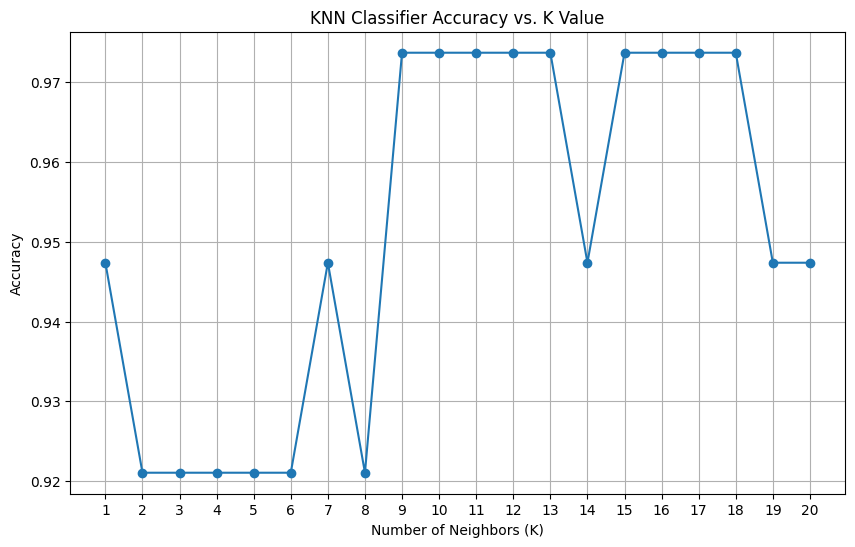

In [15]:
# Plotting accuracy vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Classifier Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [16]:
# Find the optimal K (K with highest accuracy)
optimal_k_index = np.argmax(accuracies)
optimal_k = k_values[optimal_k_index]
print(f"\nOptimal K value based on accuracy: {optimal_k}")
print(f"Highest accuracy achieved: {accuracies[optimal_k_index]:.4f}")


Optimal K value based on accuracy: 9
Highest accuracy achieved: 0.9737


### Evaluate model using accuracy, confusion matrix for the optimal K

In [17]:
print(f"\n--- Model Evaluation for Optimal K = {optimal_k} ---")

# Train the model with the optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)


--- Model Evaluation for Optimal K = 9 ---


In [18]:
# Accuracy
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal K ({optimal_k}): {accuracy_optimal:.4f}")

Accuracy with optimal K (9): 0.9737


In [19]:
# Confusion Matrix
cm_optimal = confusion_matrices[optimal_k]
print("\nConfusion Matrix for optimal K:")
print(cm_optimal)


Confusion Matrix for optimal K:
[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]


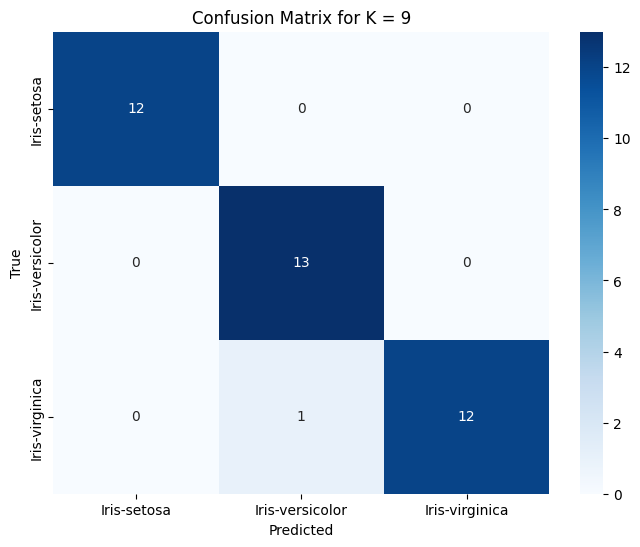

In [20]:

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues',
            xticklabels=pd.factorize(iris_df['Species'])[1],
            yticklabels=pd.factorize(iris_df['Species'])[1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for K = {optimal_k}')
plt.show()

### Visualize decision boundaries (Extra Visualization)

In [21]:
# For visualizing decision boundaries, it's often easier to use only two features.
# Let's pick 'PetalLengthCm' and 'PetalWidthCm' as they are highly discriminative.

X_vis = iris_df[['PetalLengthCm', 'PetalWidthCm']]
y_vis = iris_df['Species_encoded']

In [22]:
# Scale these two features
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

In [23]:
# Split the data for visualization (optional, can use full dataset)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis, test_size=0.25, random_state=42, stratify=y_vis
)

In [24]:
# Train KNN with optimal_k on the two features
knn_vis = KNeighborsClassifier(n_neighbors=optimal_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=9)

In [25]:
# Create meshgrid for plotting decision boundaries
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [26]:
# Predict on the meshgrid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


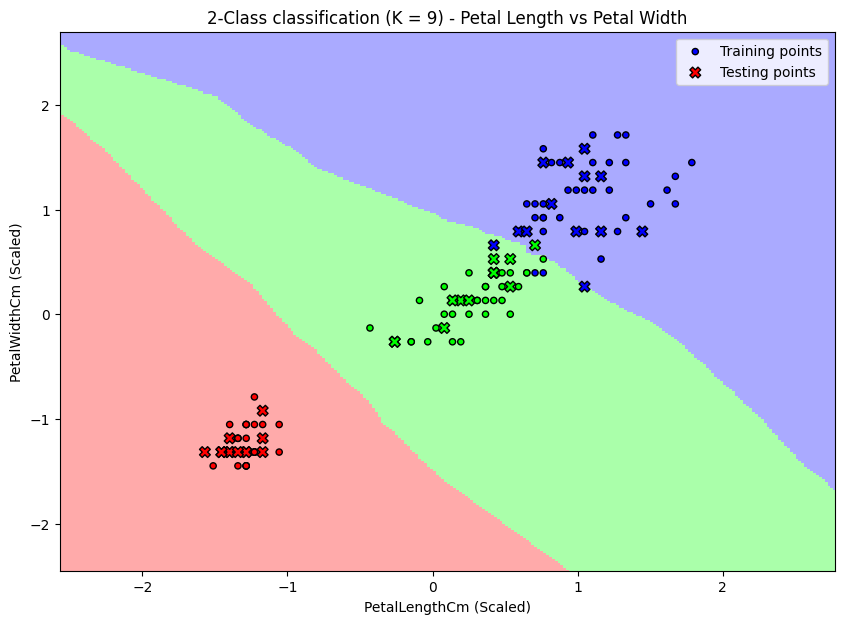

In [27]:

# Plotting
plt.figure(figsize=(10, 7))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Plot also the training points
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap=cmap_bold,
            edgecolor='k', s=20, label='Training points')
# Plot also the testing points
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, cmap=cmap_bold,
            edgecolor='k', s=60, marker='X', label='Testing points')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2-Class classification (K = {optimal_k}) - Petal Length vs Petal Width")
plt.xlabel('PetalLengthCm (Scaled)')
plt.ylabel('PetalWidthCm (Scaled)')
plt.legend()
plt.show()

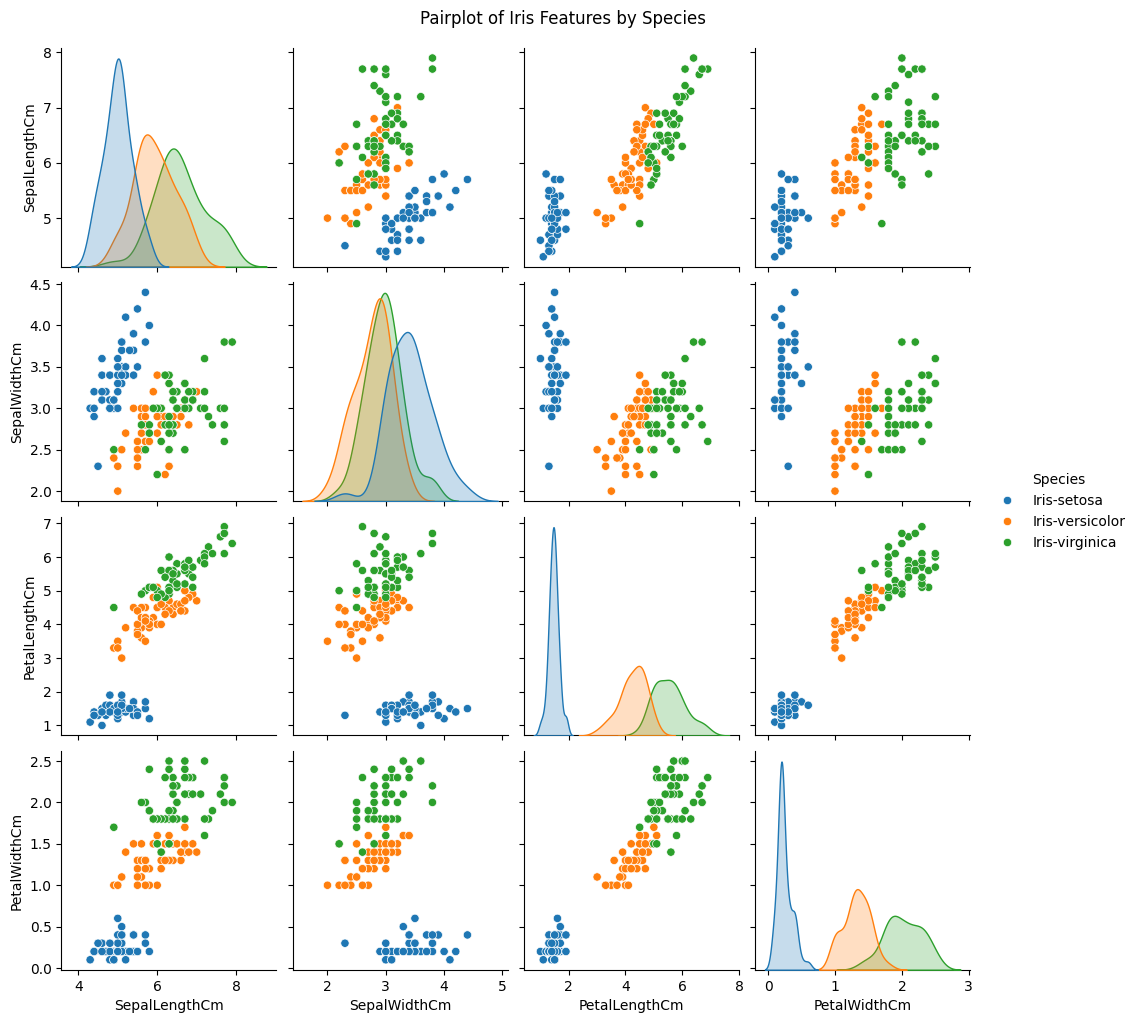

In [28]:
# Pairplot to visualize relationships between features and species
sns.pairplot(iris_df.drop('Species_encoded', axis=1), hue='Species', diag_kind='kde')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

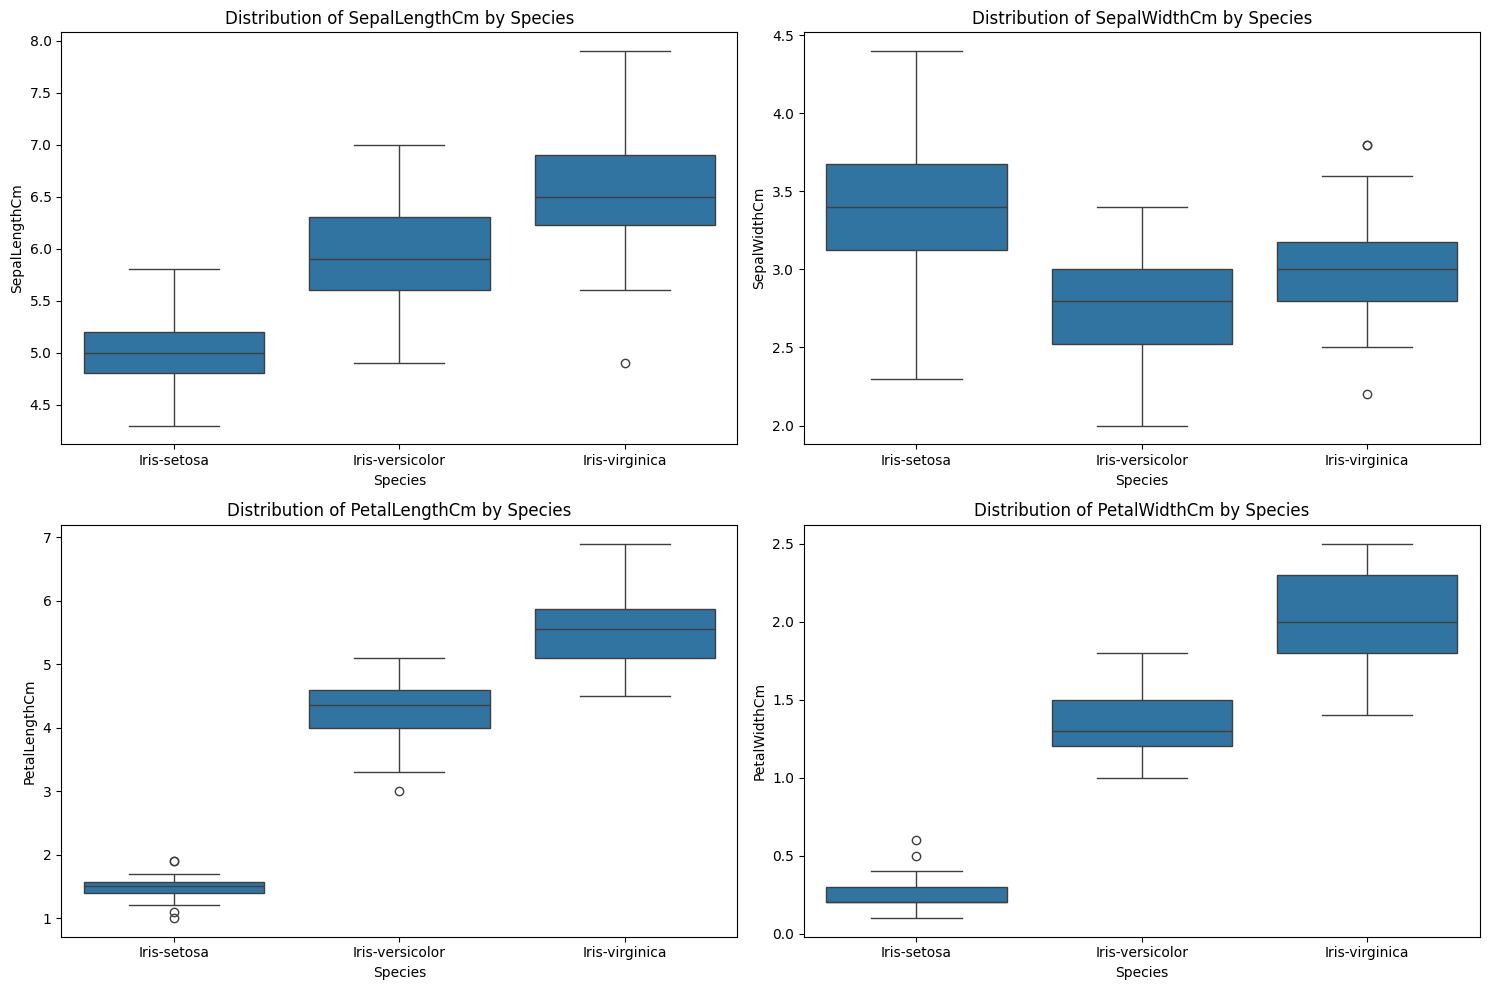

In [29]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=col, data=iris_df)
    plt.title(f'Distribution of {col} by Species')
plt.tight_layout()
plt.show()

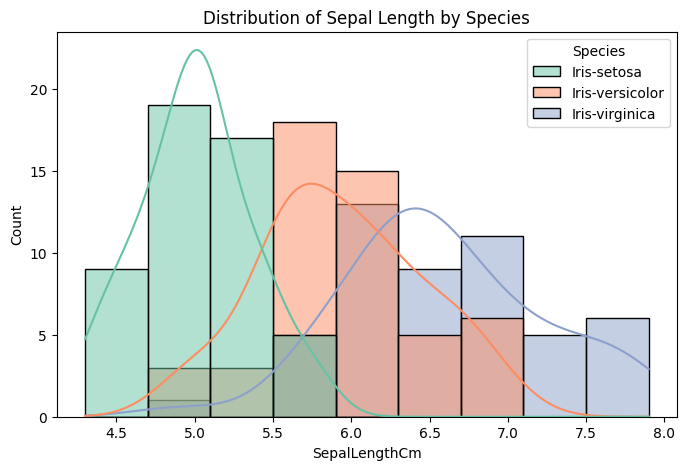

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=iris_df, x='SepalLengthCm', hue='Species', kde=True, palette='Set2')
plt.title('Distribution of Sepal Length by Species')
plt.show()

<ipython-input-32-e7708ce3ca39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='Species', y='SepalLengthCm', palette='Set2')


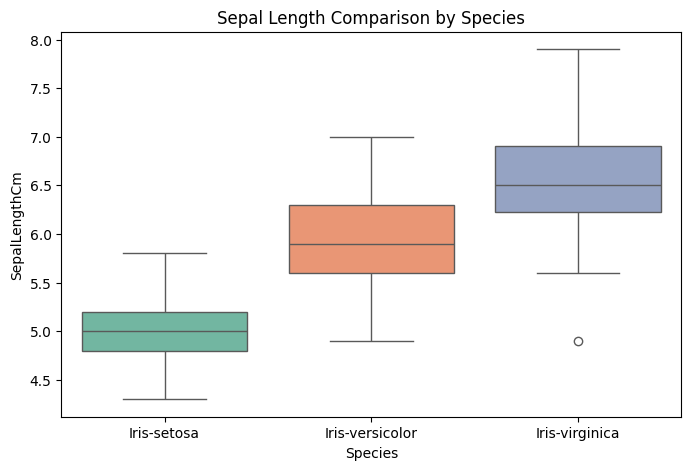

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=iris_df, x='Species', y='SepalLengthCm', palette='Set2')
plt.title('Sepal Length Comparison by Species')
plt.show()

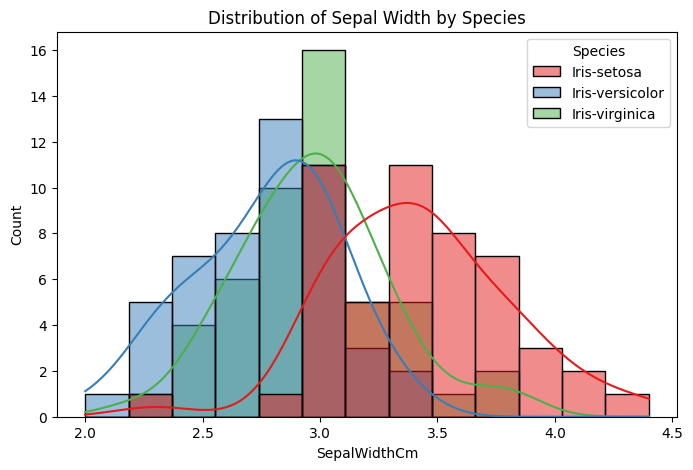

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data=iris_df, x='SepalWidthCm', hue='Species', kde=True, palette='Set1')
plt.title('Distribution of Sepal Width by Species')
plt.show()

<ipython-input-34-4a5ed691c29c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='Species', y='SepalWidthCm', palette='Set1')


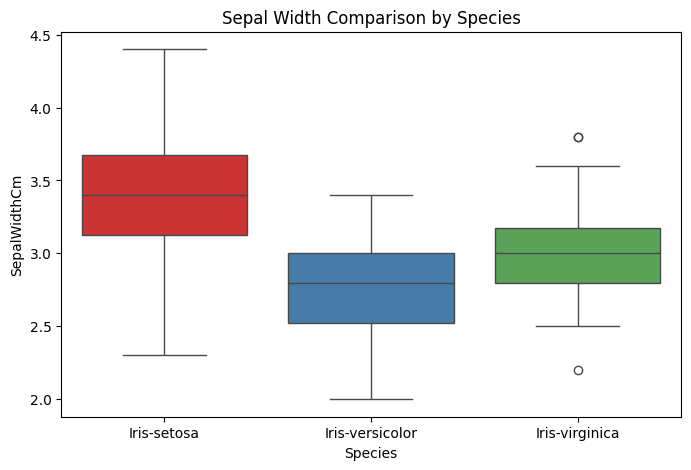

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data=iris_df, x='Species', y='SepalWidthCm', palette='Set1')
plt.title('Sepal Width Comparison by Species')
plt.show()

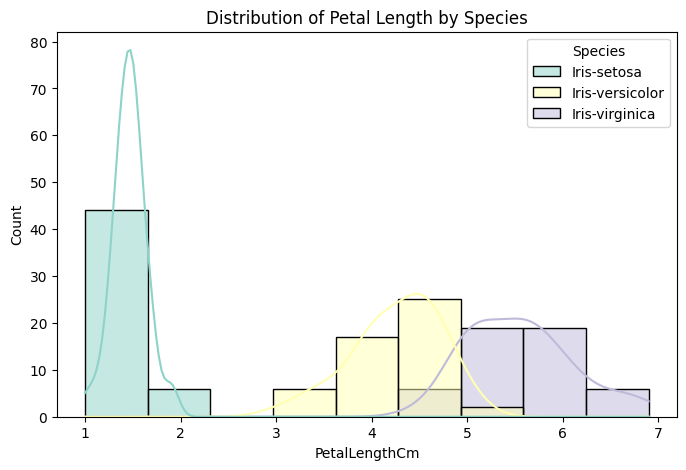

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(data=iris_df, x='PetalLengthCm', hue='Species', kde=True, palette='Set3')
plt.title('Distribution of Petal Length by Species')
plt.show()

<ipython-input-36-1a7444836242>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='Species', y='PetalLengthCm', palette='Set3')


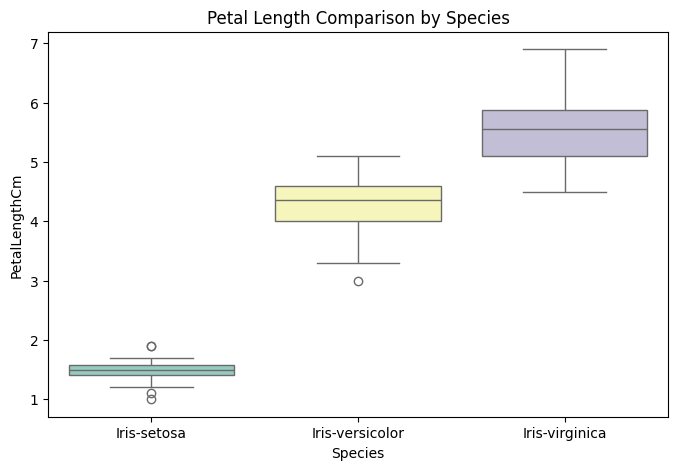

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(data=iris_df, x='Species', y='PetalLengthCm', palette='Set3')
plt.title('Petal Length Comparison by Species')
plt.show()

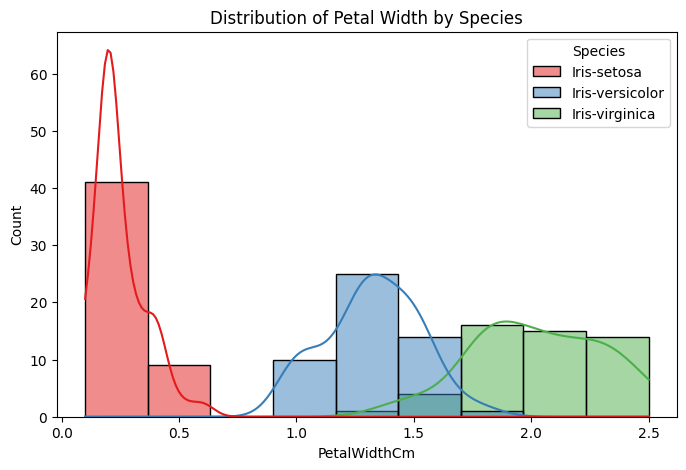

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(data=iris_df, x='PetalWidthCm', hue='Species', kde=True, palette='Set1')
plt.title('Distribution of Petal Width by Species')
plt.show()

<ipython-input-38-1fcef5efac74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='Species', y='PetalWidthCm', palette='Set1')


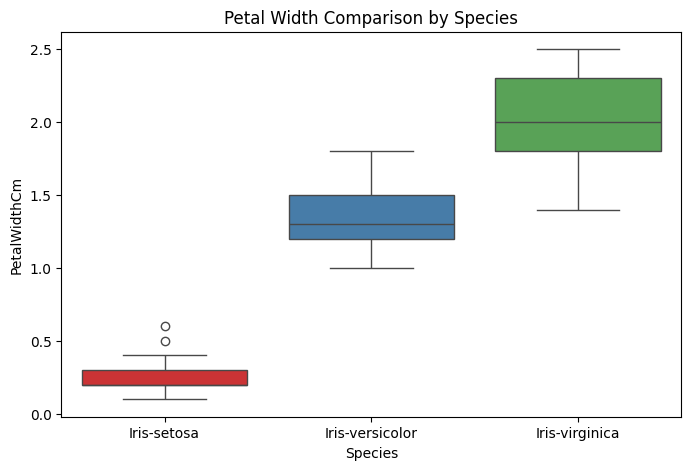

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(data=iris_df, x='Species', y='PetalWidthCm', palette='Set1')
plt.title('Petal Width Comparison by Species')
plt.show()

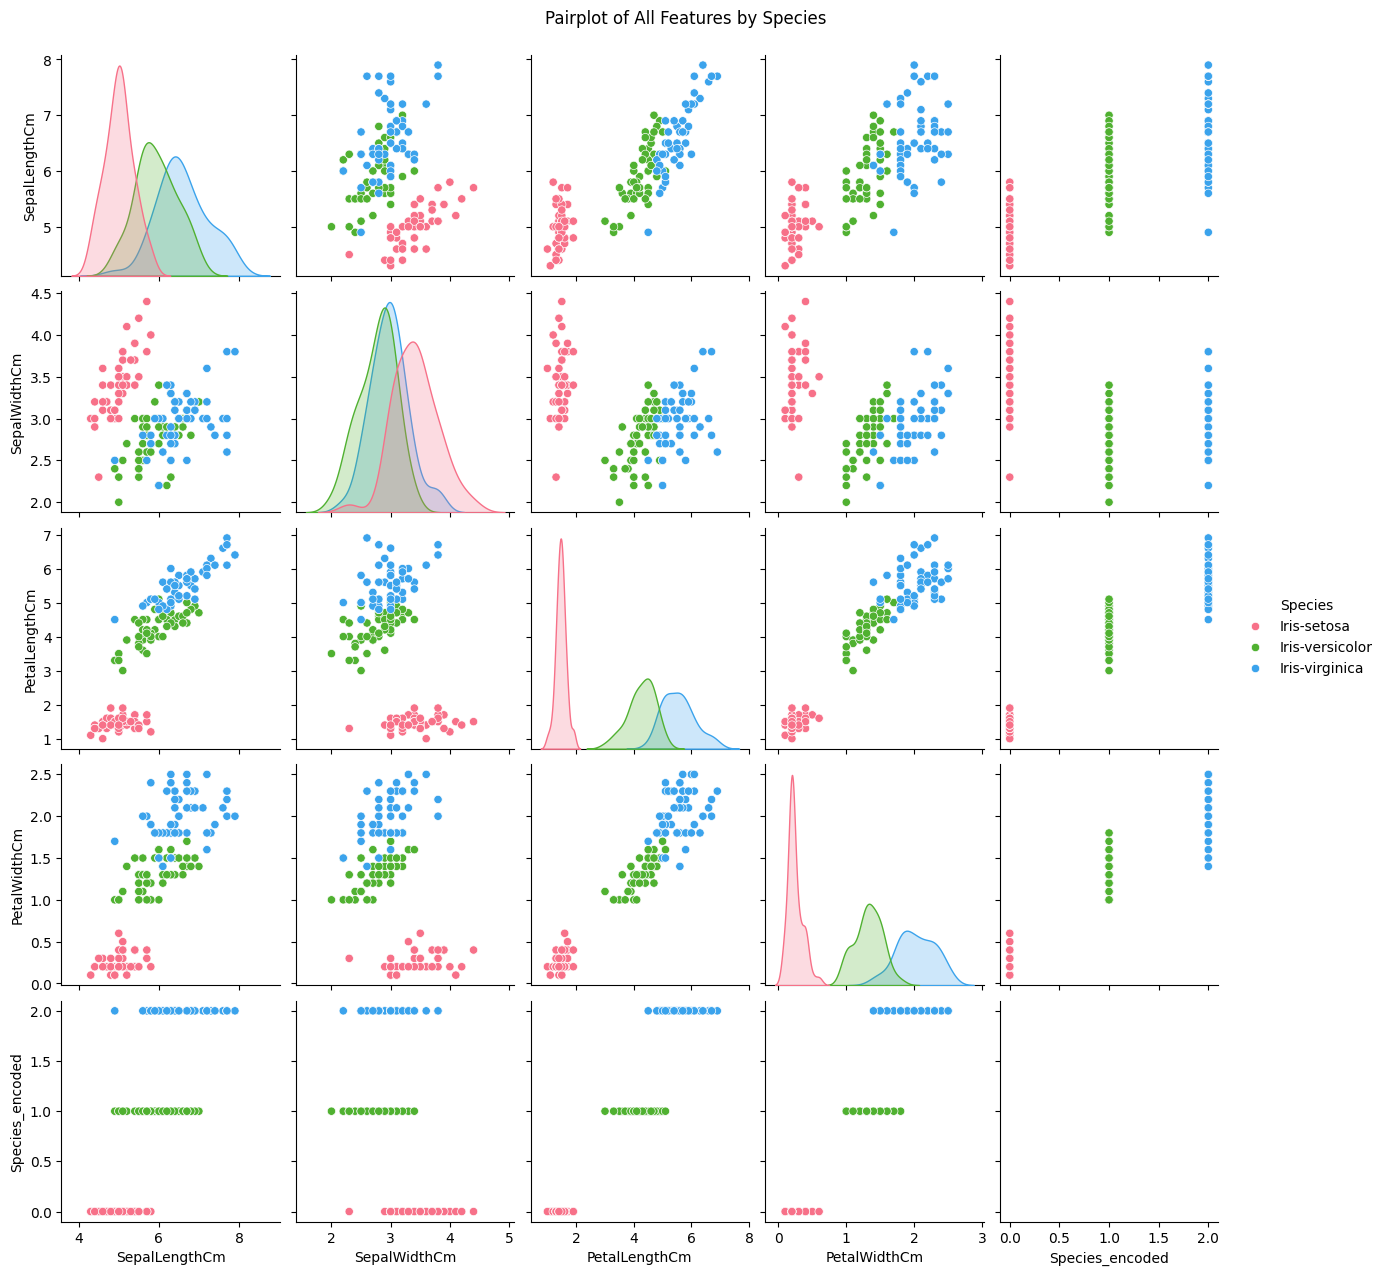

In [39]:

sns.pairplot(iris_df, hue='Species', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of All Features by Species', y=1.02)
plt.show()